# Assignment 4 - Unsupervised Learning and Neural Networks

## *GUILLEM AMAT CASTELLO*
Netid: ga98

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

# Learning objectives
Through completing this assignment you will be able to...
1. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters.
2. Apply PCA and t-SNE for performing dimensionality reduction and data visualization
3. Understand how PCA represents data in lower dimensions and understand the concept of data compression.
4. Build, tune the parameters of, and apply feedforward neural networks to data
5. Develop a detailed understanding of the math and practical implementation considerations of neural networks, one of the most widely used machine learning tools.

## 1

### [35 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience building a basic clustering algorithm to provide insight into the structure of these techniques, then compare a number of clustering techniques on a distinctive datasets to experience the pros and cons of these approaches.

**(a)** Implement your own k-means algorithm. For a measure of dissimilarity use the sum of squared error of the Euclidean distance from each point to the cluster mean. Initialize your means by selecting a set of $k$ points at random from your dataset and using those values as the initial means. You may need to run your algorithm multiple times with different initializations (picking the clustering with the lower dissimilarity measure) to get the best results. You may use the template below to assist you in your implementation. 

**(b)** Demo your algorithm. Create some data to cluster by using the `blobs` module from `scikit-learn` to construct two datasets: one with 2 cluster centers and the other with 5. Set the `random_state` keyword parameter to 0 in each to ensure the datasets are consistent with the rest of the class and generate 5,000 samples of each dataset. For each dataset rerun your k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. For your two datasets, where is the elbow in the curve and why? Plot the data and your $k$-means for the optimal value of $k$ that you determined from the elbow curve.

**(c)** Ensure your understanding of how clustering methods work. Briefly explain in 1-2 sentences each (at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering.

**(d)** Apply clustering algorithms to diverse datasets. For each of the clustering algorithms in (c) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance for each dataset. Plot the final result as a 4-by-5 subplot showing the resulting clustering of each method on each dataset. Which method works best or worst on each dataset and why? (This can be 1-2 sentences for each dataset). The datasets are:
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

*Note: for k-means, use the `scikit-learn` module rather than your own*

**ANSWER**

<br>

**a)**

In [1]:
#Import the necessary packages
import typing
import pdb
import pandas as pd
import numpy as np
import math
import sklearn

In [2]:
class Kmeans:
        '''kmeans
            Input:
                X: matrix of input data where each row represents a sample
                k: number of means to use
                max_steps: maximum number of iterations to run the algorithm

            Output:
                means: a matrix listing the k means
                cluster_assignment: a list of the cluster assignments for each samples
                dissimilarity: sum of squared error of the Euclidean distance from each point to the cluster mean
        '''
        def __init__(self, k: int, max_steps: int = 5):
            self.k = k
            self.max_steps = max_steps        
            
        def initial_clusters(self, X: pd.DataFrame):
            '''Initialization method for clusters
            '''
            
            self.clusters = {}
            
            random_init = X.sample(self.k)
            for i in range(len(random_init)):
                self.clusters[i] = random_init.iloc[i, :].to_list()

            return self.clusters
            
            #Method to initialize points randomly [inefficient]
            #for i in range(self.k):
            #    cluster = []
            #    for column in X:
            #        cluster.append(np.random.randint(min(X[column]), max(X[column])))
            #    self.clusters[i] = cluster
            #return self.clusters
        
        
        def new_clusters(self, X: pd.DataFrame, classifications: np.array):
            '''Create new cluster centroids
            '''
            
            self.clusters = {}
            
            for i in range(self.k):
                cluster = []
                for column in X:
                    cluster.append(np.mean(X[np.array(classifications) == i][column]))
                self.clusters[i] = cluster
            
            return self.clusters
        
        def train(self, X: pd.DataFrame):
            '''Train the algorithm
            '''
        
            clusters = self.initial_clusters(X)

            for i in range(self.max_steps):
                classifications = []
                error = []
                for _, row in X.iterrows():
                    distances = {}
                    for cluster, values in clusters.items():
                        distances[cluster] = np.linalg.norm(np.array(row) - np.array(values)) 
                    classifications.append(min(distances, key = distances.get))
                    error.append(distances[min(distances.keys(), key = (lambda k: distances[k]))])
                    pass
                
                total_error = round(np.sum(np.array(error)**2), 2)
                clusters = self.new_clusters(X, classifications) 
            
            self.clusters = clusters
            self.error = total_error
            self.classifications = classifications

<br>

**b)**

We will start by creating two samples as specified in the instructions:

In [3]:
from sklearn.datasets import make_blobs

two_clusters, _ = make_blobs(n_samples = 5000, n_features = 2, centers = 2,  random_state = 0)
five_clusters, _ = make_blobs(n_samples = 5000, n_features = 2, centers = 5, random_state = 0)

<br>

We will plot the samples in order to better visualize them:

[]

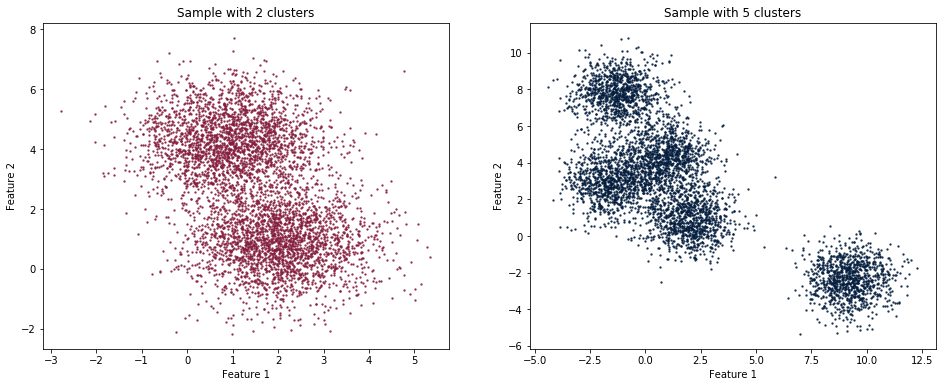

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
ax1, ax2 = axes

#Plotting Sample with 2 clusters
ax1.scatter(two_clusters[:,0], two_clusters[:, 1], s = 2,  alpha = 0.75, color='#851e3e')
ax1.set_title('Sample with 2 clusters')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.plot()

#Plotting Sample with 5 clusters
ax2.scatter(five_clusters[:,0], five_clusters[:, 1], s = 2,  alpha = 0.75, color = '#051e3e')
ax2.set_title('Sample with 5 clusters')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.plot()

<br>

We will now run our algorithm for different values of k:

In [20]:
error_two_clusters = {}
classifications_two_clusters = {}

for i in range(1, 11):
    #Two clusters
    Kmeans_2 = Kmeans(i)
    Kmeans_2.train(pd.DataFrame(two_clusters))
    error_two_clusters[i] = Kmeans_2.error
    classifications_two_clusters[i] = Kmeans_2.classifications

In [55]:
error_five_clusters = {}
classifications_five_clusters = {}

for i in range(1, 11):
    #Five clusters
    Kmeans_5 = Kmeans(i)
    Kmeans_5.train(pd.DataFrame(five_clusters))
    error_five_clusters[i] = Kmeans_5.error
    classifications_five_clusters[i] = Kmeans_5.classifications

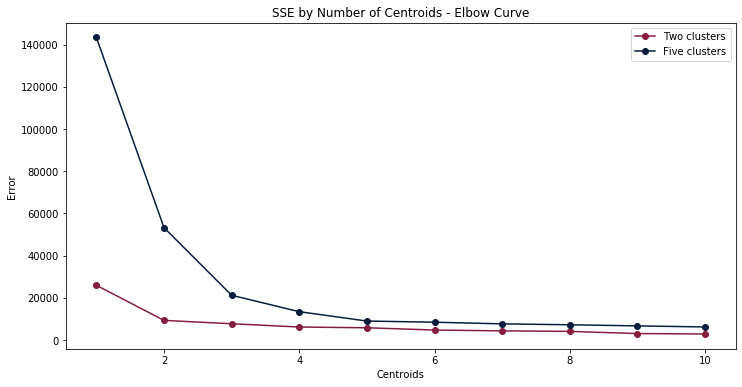

In [60]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),list(error_two_clusters.values()), marker = 'o', color='#851e3e',label="Two clusters")
plt.plot(range(1,11),list(error_five_clusters.values()), marker = 'o', color='#051e3e',label="Five clusters")
plt.title("SSE by Number of Centroids - Elbow Curve")
plt.xlabel("Centroids")
plt.ylabel("Error")
plt.legend()
plt.show()

<br>
Finding the elbow of the curve has a bit of art in it. To me it is the point where the drop in the error decelerates and stabilizes, so going along with intuition as well, I selected 5 Centroids as the elbow for the 5 cluster sample and 2 Centroids as the elbow for the 2 cluster sample. We will proceed and plot the clusters into the data:

[]

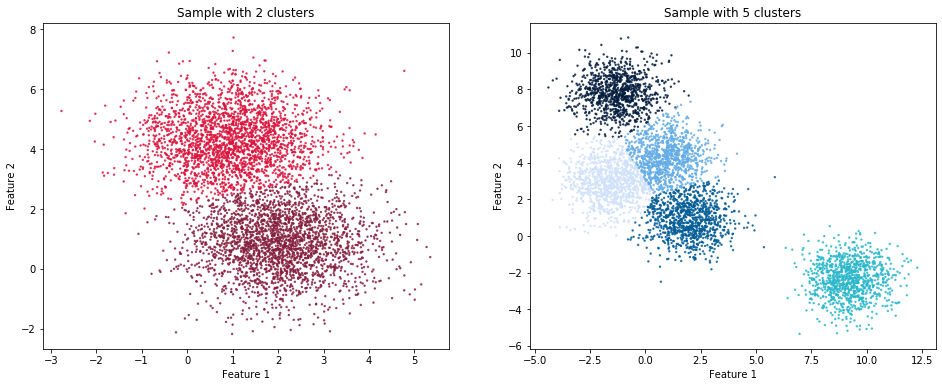

In [57]:
from matplotlib.colors import ListedColormap

fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
ax1, ax2 = axes

colors_two_clusters = ListedColormap(['#851e3e', '#DC143C'])

#Plotting Sample with 2 clusters
ax1.scatter(two_clusters[:,0], two_clusters[:, 1], s = 2,  alpha = 0.75,
            c=classifications_two_clusters[2], cmap=colors_two_clusters)
ax1.set_title('Sample with 2 clusters')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.plot()

colors_five_clusters = ListedColormap(['#2ab7ca', '#005b96', '#63ace5', '#051e3e', '#d0e1f9'])

#Plotting Sample with 5 clusters
ax2.scatter(five_clusters[:,0], five_clusters[:, 1], s = 2,  alpha = 0.75,
            c=classifications_five_clusters[5], cmap=colors_five_clusters)
ax2.set_title('Sample with 5 clusters')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.plot()

The results are what we expected, the K-means was able to identify the different clusters. We can get an intuition of why there was a big drop for 2 Centroids in the 5 cluster sample, as K-means could identify the cluster on the right correctly and all the other clusters in the left as one single cluster.

<br>

**c)**

**1. K-Means:** It finds a number of pre-specified clusters by using a measure of distance, such as Euclidean or Manhattan, to assign points to their nearest cluster. It iterates many times by adjusting centroids to the mean of all points assigned to each centroid.
<br>
**2. Agglomerative Clustering:** It finds multiple clusters by pairing up the points, point-cluster, or cluster-cluster that are closest to each other at each iteration by using a measure of distance. After it has finished running, the desired number of clusters can be selected.
<br>
**3. Gaussian Mixture Models:** It produces multiple Gaussian Distributions that work as clusters with a mean that works as their center, a covariance matrix that defines the width of the distribution and a function that defines how big the distribution is. These three parameters can be combined to identify clusters of different shapes.
<br>
**4. DBSCAN:** It is a density-based clustering algorithm, which classifies points as *Core*, *Border* or *Noise* depending on the quantity of neighbors they have in a set distance. It then groups together Core and Border points to create different clusters.
<br>
**5. Spectral Clustering:** It uses connectedness as opposed to distance as a measure of similarity. It then projects variables into a lower dimension using an affinity matrix where a clustering algorithm like K-means can be used to identify clusters.

<br>

**d)**

In [52]:
#Import the necessary algorithms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

In [53]:
#Import the data
jain = pd.read_csv(r'C:\Users\guill\OneDrive\Desktop\jain.txt', sep = '\t', header = None)
D31 = pd.read_csv(r'C:\Users\guill\OneDrive\Desktop\D31.txt', sep = '\t', header = None)
Compound = pd.read_csv(r'C:\Users\guill\OneDrive\Desktop\Compound.txt', sep = '\t', header = None)
Aggregation = pd.read_csv(r'C:\Users\guill\OneDrive\Desktop\Aggregation.txt', sep = '\t', header = None)

datasets = [jain, D31, Compound, Aggregation]
titles = ['jain', 'D31', 'Compound', 'Aggregation']

<br>
We will start by plotting the datasets to get an intuition of their shape:

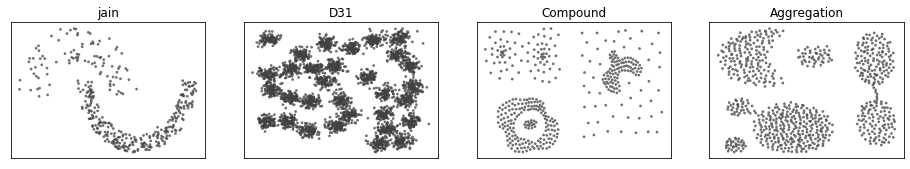

In [54]:
import pdb

figure, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 2.5))

for i, data in enumerate(datasets):
    axes[i].scatter(data.iloc[:, 0], data.iloc[:, 1], color = '#404040', s = 7.5, alpha = 0.75, edgecolor = 'None')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
    axes[i].set_title(titles[i])
    pass

<br>
We will proceed and use the different algorithms to cluster the data:

In [117]:
#Creating some variables to store our values
clusters = [2, 32, 4, 7]
gmm_type = ['full', 'spherical', 'spherical', 'tied']
dbscan_eps = [1.5, 0.5, 2, 2]
dbscan_minsamples = [7, 4, 5, 5]
kmeans_list = {}
hierarchical_list = {}
gaussian_list = {}
dbscan_list = {}
spectral_list = {}

i = 0

for data in datasets:
        data = data.iloc[:,:2]
        
        #KMeans
        km = KMeans(n_clusters = clusters[i]).fit(data)
        kmeans_list[i] = km.labels_
        
        #Hierarchical
        hierarchical = AgglomerativeClustering(clusters[i]).fit(data)
        hierarchical_list[i] = hierarchical.labels_
        
        #Gaussian
        gmm = GaussianMixture(n_components = clusters[i], n_init = 5, covariance_type = gmm_type[i]).fit(data)
        gaussian_list[i] = gmm.predict(data) 
        
        #DBSCAN
        dbscan = DBSCAN(eps = dbscan_eps[i], min_samples = dbscan_minsamples[i]).fit(data)
        dbscan_list[i] = dbscan.labels_
        
        #Spectral
        spectral = SpectralClustering(n_clusters=clusters[i], assign_labels="discretize", random_state=0).fit(data)
        spectral_list[i] = spectral.labels_
        
        #Update i
        i += 1
        
        

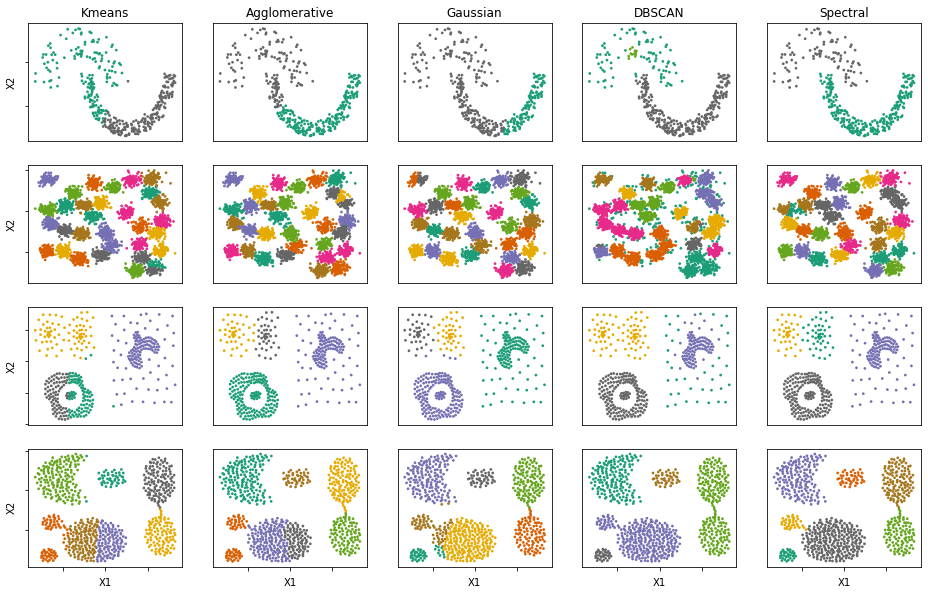

In [122]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows = 4, ncols = 5, figsize = (16,10))
cluster_lists = [kmeans_list, hierarchical_list, gaussian_list, dbscan_list, spectral_list]
titles = ['Kmeans', 'Agglomerative', 'Gaussian', 'DBSCAN', 'Spectral']

i = 0
j = 0

for data in datasets:
    for cluster in cluster_lists:
        axes[i, j].scatter(data.iloc[:,0], data.iloc[:,1], edgecolor = 'None', s = 7.5,
                           c = cluster[i], cmap ='Dark2')
        axes[i,j].set_yticklabels([])
        axes[i,j].set_xticklabels([])
        if i == 0 and j == 0:
            axes[i,j].set_ylabel('X2')
            axes[i,j].set_title(titles[j])
            axes[i,j].get_xaxis().set_visible(False)
        elif i == 0:
            axes[i,j].set_title(titles[j])
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)
        elif i == 3 and j != 0:
            axes[i,j].get_yaxis().set_visible(False)
            axes[i,j].set_xlabel('X1')
        elif j == 0 and i != 3:
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].set_ylabel('X2')
        elif i == 3 and j == 0:
            axes[i,j].set_xlabel('X1')
            axes[i,j].set_ylabel('X2')
        else:
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)
        axes[i,j].plot()
        j += 1
    i += 1
    j = 0
    pass
i = 0

The visualizations of the datasets above give us some intuition into which models work best in detecting clusters that have different shapes. 
- *Spectral clustering* does a really good job in all cases. It only really suffers from the disadvantage that the number of clusters must be prespecified beforehand. 
- *K-means* is a good algorithm when one finds circular or geometric shapes but suffers otherwise and can mix up one cluster for two. The results depend a lot on the initialization of centroids.
- *GMMs* are quite useful and give a lot of flexibility as one can specify the shape of the clusters to be found. It can suffer if all clusters do not have the same shape.
- *DBSCAN* gives very good results if hyperparameter tunning is done the right way. For datasets with very clear cluster densities, it is an excellent option. As a drawback, it might miss some points that would belong to one cluster as noise.
- *Hierarchical Clustering* is similar to GMMs in terms of results, if we prespecify the number of clusters to be found, even though the algorithm is very different.
<br>

## 2

### [20 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? Briefly comment on how this may impact how well-clustered the data are. *You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available in most problems.*

**ANSWER**

**a)**

In [56]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [57]:
from sklearn.datasets import load_digits
digits = load_digits(return_X_y = True)

X_df = digits[0]
y_df = digits[1]

In [58]:
#Scaling the Dataframe to have mean = 0 and variance = 1
X_scaled = preprocessing.scale(X_df)

pca = PCA(n_components = 2)
components = pca.fit_transform(X_scaled)
components_df = pd.DataFrame(data = components,
                             columns = ['Principal Component 1', 'Principal Component 2'])

[]

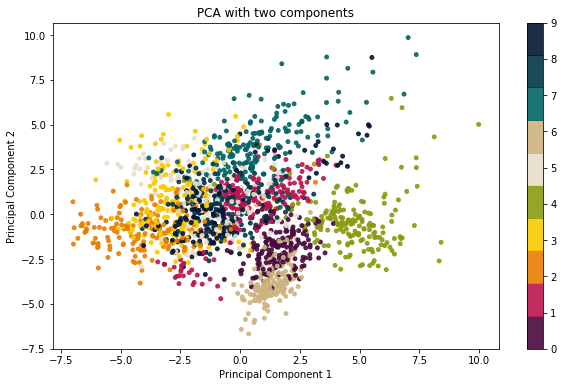

In [59]:
#plotting the scaled features
colors = ListedColormap(['#490A3D', '#BD1550', '#E97F02', '#F8CA00', '#8A9B0F',
                        '#E8DDCB', '#CDB380', '#036564', '#033649', '#031634'])

fig, _ = plt.subplots(ncols=1, figsize=(10, 6), edgecolor='k')

#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(components_df.iloc[:, 0], components_df.iloc[:, 1], s = 15,  alpha = 0.9,
            c = y_df, cmap = colors)
plt.title('PCA with two components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.plot()

<br>

**b)**

In [60]:
pca_full = PCA(64)
full_components = pca_full.fit(X_scaled)

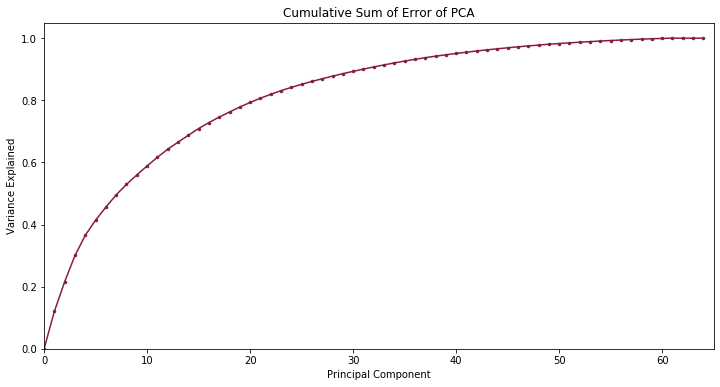

In [62]:
plt.figure(figsize=(12,6))
plt.plot(range(0,65), np.append(0, np.cumsum(full_components.explained_variance_ratio_)), 
         markersize = 2.5, marker = 'o', color='#851e3e')

plt.title("Cumulative Sum of Error of PCA")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.xlim(0,65)
plt.ylim(0, 1.05)
plt.show()

In [63]:
variance_explained = round(np.cumsum(full_components.explained_variance_ratio_)[1] * 100, 2)
print(f'The amount of variance explained by the first two Principal Components is {variance_explained}%')

The amount of variance explained by the first two Principal Components is 21.59%


Therefore the amount of variance that remains unexplained by the first two Principle Components is 78.41%.

<br>

**c)**

In [80]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
tsne_digits = tsne.fit_transform(X_df)
tsne_df = pd.DataFrame(data = tsne_digits,
                       columns = ['Factor 1', 'Factor 2'])

[]

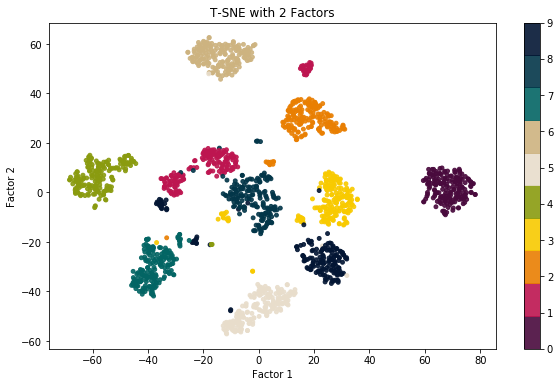

In [81]:
colors = ListedColormap(['#490A3D', '#BD1550', '#E97F02', '#F8CA00', '#8A9B0F',
                        '#E8DDCB', '#CDB380', '#036564', '#033649', '#031634'])

fig, _ = plt.subplots(ncols=1, figsize=(10, 6), edgecolor='k')

plt.scatter(tsne_df.iloc[:, 0], tsne_df.iloc[:, 1], s = 15,  alpha = 0.9,
            c = y_df, cmap = colors)
plt.title('T-SNE with 2 Factors')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.colorbar()
plt.plot()

**d)**

It is very easy to see that T-SNE performs much better than PCA when reducing the dimensionality of the data into a few components/factors. With T-SNE's reduction we would be able to easily apply a Clustering algorithm to identify the different numbers and get very good precision metrics.

Principal Component Analysis applies linear transformations to the data, while T-SNE uses a probabilistic and mathematically heavy model to compute the different factors. T-SNE seems to yield better results, specifically at this task, but at a cost of the time it needs and the computational resources it consumes.

## 3

### [45 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier. You may use numpy if you wish but no other libraries.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

To guide you in the right direction with this problem, please find a skeleton of a neural network class below. You absolutely MAY use additional methods beyond those suggested in this template, but I see these methods as the minimum required to implement the model cleanly.

One of the greatest challenges of this implementations is that there are many parts and a bug could be present in any of them. I would strongly encourage you to create unit tests for most modules. Without doing this will make your code extremely difficult to bug. You can create simple examples to feed through the network to validate it is correctly computing activations and node values. Also, if you manually set the weights of the model, you can even calculate backpropagation by hand for some simple examples (admittedly, that unit test would be challenging, but a unit test is possible). You can also verify the performance of your overall neural network by comparing it against the `scikit-learn` implementation and using the same architecture and parameters as your model.

**(b)** Apply your neural network. Create a training and validation dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset plotting your learning curves (training and validation error for each epoch of stochastic gradient descent, where an epoch represents having trained on each of the training samples one time). Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one subplot, and the validation data on the other subplot. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve and compare against the `scikit-learn` `MLPClassifier` trained with the same parameters.

**(c)** Suggest two ways in which you neural network implementation could be improved.

**ANSWER**

**a)**

In [27]:
import pdb
import numpy as np
import math

In [28]:
class NeuralNetwork(object):
    
    def __init__(self, n_in: int, n_layer1: int, n_layer2: int, n_out: int, learning_rate: float = 0.1):
        '''__init__
        Class constructor: Initialize the parameters of the network including
        the learning rate, layer sizes, and each of the parameters
        of the model (weights, placeholders for activations, inputs, 
        deltas for gradients, and weight gradients). This method
        should also initialize the weights of your model randomly
            Input:
                n_in:          number of inputs
                n_layer1:      number of nodes in layer 1
                n_layer2:      number of nodes in layer 2
                n_out:         number of output nodes
                learning_rate: learning rate for gradient descent
            Output:
                none
        '''
        
        self.n_in = n_in
        self.n_layer1 = n_layer1
        self.n_layer2 = n_layer2
        self.n_out = n_out
        self.learning_rate = learning_rate
        
        #Weights
        self.w_layer1 = self.weight_initialization(n_in, n_layer1)
        self.w_layer2 = self.weight_initialization(n_layer1, n_layer2)
        self.w_out = self.weight_initialization(n_layer2, n_out)
        
        #Activators
        self.a_layer1 = np.ones(n_layer1)
        self.a_layer2 = np.ones(n_layer2)
        self.a_out = np.ones(n_out)
        
        #Activated: Zs
        self.z_layer1 = np.ones(n_layer1)
        self.z_layer1 = np.ones(n_layer2)
        self.z_out = np.ones(n_out) #y-hat 
        
    def weight_initialization(self, n_features: int, n_layer: int):
        '''weight_initialization
        Weights are initialized by sampling from a normal distribution with mean 0 and var = 1/n_layer{i}
        '''
        #np.random.normal(0, np.sqrt(1/n_layer), (n_layer, n_features))
        
        return np.random.randn(n_layer, n_features)
    
    def forward_propagation(self, x):
        '''forward_propagation
        Takes a vector of your input data (one sample) and feeds
        it forward through the neural network, calculating activations and
        layer node values along the way.
            Input:
                x: a vector of data representing 1 sample [n_in x 1]
            Output:
                y_hat: a vector (or scaler of predictions) [n_out x 1]
                (typically n_out will be 1 for binary classification)
        '''
        #Computing z_layer1
        self.a_layer1 = np.matmul(x, self.w_layer1.T)
        self.z_layer1 = self.sigmoid(self.a_layer1)
        
        #Computing z_layer2
        self.a_layer2 = np.matmul(self.z_layer1, self.w_layer2.T)
        self.z_layer2 = self.sigmoid(self.a_layer2)
        
        #Computing y_hat
        self.a_out = np.matmul(self.z_layer2, self.w_out.T)
        self.z_out = self.sigmoid(self.a_out) #y_hat
        
    def compute_loss(self, X, y):
        '''compute_loss
        Computes the current loss/cost function of the neural network
        based on the weights and the data input into this function.
        To do so, it runs the X data through the network to generate
        predictions, then compares it to the target variable y using
        the cost/loss function
            Input:
                X: A matrix of N samples of data [N x n_in]
                y: Target variable [N x 1]
            Output:
                loss: a scalar measure of loss/cost
        '''
        
        y_hat = self.z_out
        self.error = (1/2) * np.sum(np.square(y_hat - y))
        
        return self.error
        
    def backpropagate(self, x, y):
        '''backpropagate
        Backpropagate the error from one sample determining the gradients
        with respect to each of the weights in the network. The steps for
        this algorithm are:
            1. Run a forward pass of the model to get the activations 
               Corresponding to x and get the loss function of the model 
               predictions compared to the target variable y
            2. Compute the deltas (see lecture notes) and values of the
               gradient with respect to each weight in each layer moving
               backwards through the network
    
            Input:
                x: A vector of 1 samples of data [n_in x 1]
                y: Target variable [scalar]
            Output:
                loss: a scalar measure of the loss/cost associated with x,y
                      and the current model weights
        '''
        
        #All steps of backpropagation
        derivative_error = self.z_out - y
        
        #Delta calculations
        self.delta_out = derivative_error * self.sigmoid_derivative(self.a_out)
        self.delta_layer_2 = np.matmul(self.w_out.T, self.delta_out) * self.sigmoid_derivative(self.a_layer2.T)
        self.delta_layer_1 = np.matmul(self.w_layer2.T, self.delta_layer_2) * self.sigmoid_derivative(self.a_layer1.T)
        
        #Gradient calculations (w)
        self.w_gradient_out = np.matmul(np.reshape(self.delta_out,(self.delta_out.shape[0],1)),
                                        np.reshape(self.z_layer2, (self.z_layer2.shape[0],1)).T)
        self.w_gradient_layer_2 = np.matmul(np.reshape(self.delta_layer_2, (self.delta_layer_2.shape[0], 1)),
                                            np.reshape(self.z_layer1, (self.z_layer1.shape[0], 1)).T)
        self.w_gradient_layer_1 = np.matmul(np.reshape(self.delta_layer_1, (self.delta_layer_1.shape[0],1)),
                                            np.reshape(x, (x.shape[0],1)).T)
        
    def stochastic_gradient_descent_step(self):
        '''stochastic_gradient_descent_step
        Using the gradient values computed by backpropagate, update each
        weight value of the model according to the familiar stochastic
        gradient descent update equation.
        
        Input: none
        Output: none
        '''
        
        self.w_layer1 = self.w_layer1 - self.learning_rate * self.w_gradient_layer_1
        self.w_layer2 = self.w_layer2 - self.learning_rate * self.w_gradient_layer_2
        self.w_out = self.w_out - self.learning_rate * self.w_gradient_out
    
    def fit(self, X, y, max_epochs = 1000, learning_rate = 0.1, get_validation_loss = False):
        '''fit
            Input:
                X: A matrix of N samples of data [N x n_in]
                y: Target variable [N x 1]
            Output:
                training_loss:   Vector of training loss values at the end of each epoch
                validation_loss: Vector of validation loss values at the end of each epoch
                                 [optional output if get_validation_loss==True]
        '''
        
        self.max_epochs = max_epochs
        self.learning_rate = learning_rate
        self.training_loss = []
        self.validation_loss = []
        
        N = int(X.shape[0]*0.8)
        indexes = np.arange(X.shape[0])
        np.random.shuffle(indexes)
        
        if get_validation_loss == True:
            X_train = X[indexes[:N], :]
            y_train = y[indexes[:N], :]
            X_validation = X[indexes[N:], :]
            y_validation = y[indexes[N:], :]
        
        else:
            X_train = X
            y_train = y
           
        indexes_epoch = np.arange(X_train.shape[0])
        
        for i in range(max_epochs):
            
            np.random.shuffle(indexes_epoch)
            
            for j in range(X_train.shape[0]):
            
                vector = X_train[indexes_epoch[j], :]
                target = y_train[indexes_epoch[j], :]
            
                self.forward_propagation(vector)
                self.backpropagate(vector, target)
                self.stochastic_gradient_descent_step()
            
            #Compute loss for X_train
            self.forward_propagation(X_train)
            self.training_loss.append(self.compute_loss(X_train, y_train))
            
            if get_validation_loss == True:
                self.forward_propagation(X_validation)
                self.validation_loss.append(self.compute_loss(X_validation, y_validation))
            
        
    def predict_proba(self, X):
        '''predict_proba
        Compute the output of the neural network for each sample in X, with the last layer's
        sigmoid activation providing an estimate of the target output between 0 and 1
            Input:
                X: A matrix of N samples of data [N x n_in]
            Output:
                y_hat: A vector of class predictions between 0 and 1 [N x 1]
        '''
        self.forward_propagation(X)
        
        return self.z_out
        
    def predict(self, X, decision_thresh = 0.5):
        '''predict
        Compute the output of the neural network prediction for 
        each sample in X, with the last layer's sigmoid activation 
        providing an estimate of the target output between 0 and 1, 
        then thresholding that prediction based on decision_thresh
        to produce a binary class prediction
            Input:
                X: A matrix of N samples of data [N x n_in]
                decision_threshold: threshold for the class confidence score
                                    of predict_proba for binarizing the output
            Output:
                y_hat: A vector of class predictions of either 0 or 1 [N x 1]
        '''
        
        self.forward_propagation(X)
        
        return np.where(self.z_out > decision_thresh, 1, 0)       
        
    def sigmoid(self, X):
        '''sigmoid
        Compute the sigmoid function for each value in matrix X
            Input:
                X: A matrix of any size [m x n]
            Output:
                X_sigmoid: A matrix [m x n] where each entry corresponds to the
                           entry of X after applying the sigmoid function
        '''
        def regular_sigmoid(activator_i):
            return 1/(1 + math.exp(-activator_i))
        
        vectorized_sigmoid = np.vectorize(regular_sigmoid)
        
        return vectorized_sigmoid(X) #Zs

    
    def sigmoid_derivative(self, X):
        '''sigmoid_derivative
        Compute the sigmoid derivative function for each value in matrix X
            Input:
                X: A matrix of any size [m x n]
            Output:
                X_sigmoid: A matrix [m x n] where each entry corresponds to the
                           entry of X after applying the sigmoid derivative function
        '''
        def regular_sigmoid_derivative(activator_i):
            return (1/(1 + math.exp(-activator_i)))*(1 - (1/(1 + math.exp(-activator_i))))

        vectorized_sigmoid_derivative = np.vectorize(regular_sigmoid_derivative)
        
        return vectorized_sigmoid_derivative(X)  


<br>

**b)**

We will begin by creating a dataset and fitting it to the data:

In [29]:
from sklearn.datasets import make_moons

In [44]:
X, y = make_moons(600, noise = 0.2)

y = np.reshape(y, (600,1))

X_train = X[:500, :]
y_train = y[:500, :]
X_test = X[500:, :]
y_test = y[500:, :]

In [45]:
nn = NeuralNetwork(2, 5, 5, 1)
nn.fit(X_train, y_train, learning_rate = 0.1, max_epochs = 500, get_validation_loss = True)

<br>
<br>
We will proceed and plot the error for the train and validation set for every epoch:

In [46]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_recall_curve, f1_score, auc, roc_curve

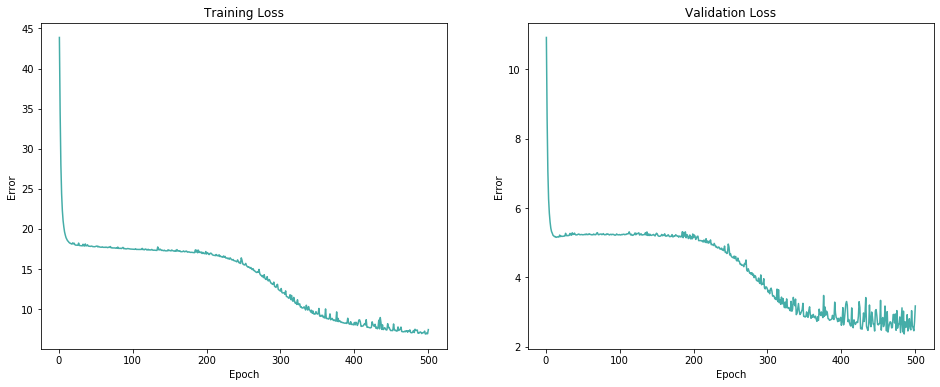

In [47]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
ax1, ax2 = axes

#Training
ax1.plot(range(1,501),nn.training_loss, color='#45ADA8')
ax1.set_title("Training Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Error")

#Validation
ax2.plot(range(1,501),nn.validation_loss, color='#45ADA8')
ax2.set_title("Validation Loss")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Error")
plt.show()

<br>
<br>
We will visualize the ROC curve of the Neural Network that we created against the one from scikit-learn:

In [81]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(5,5), learning_rate_init = 0.1, max_iter = 500, activation = 'logistic')
clf.fit(X_train, np.ravel(y_train))

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.1, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

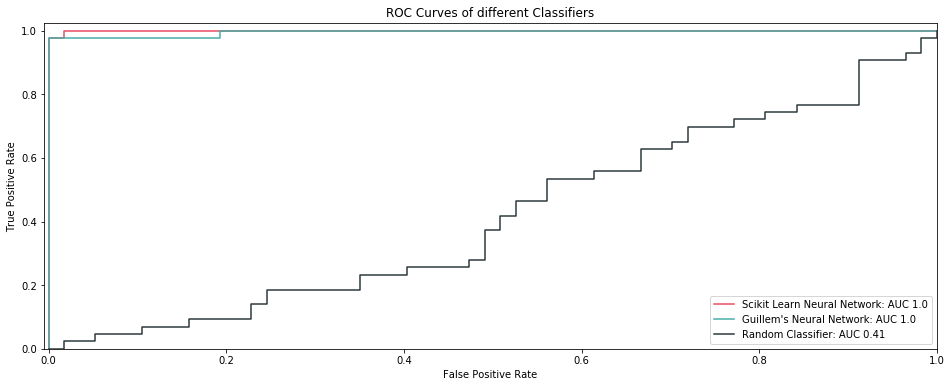

In [82]:
#Creating a random guess classifier
random_guess = np.random.rand(len(y_test), 1)
fpr, tpr, thresh = roc_curve(y_test, random_guess, pos_label = 1)
random_auc = auc(fpr, tpr)

#ROC and AUC of our Neural Network
fpr_l, tpr_l, thresh_l = roc_curve(y_test, nn.predict_proba(X_test), pos_label = 1)
mynn_auc = auc(fpr_l, tpr_l)

#Scikit Learn Neural Network
fpr_2, tpr_2, thresh_2 = roc_curve(y_test, clf.predict_proba(X_test)[:, 1], pos_label = 1)
clf_auc = auc(fpr_2, tpr_2)


plt.figure(figsize = (16, 6))
plt.plot(fpr_2, tpr_2, color = "#E84A5F", label = 'Scikit Learn Neural Network: AUC {}'.format(round(clf_auc, 2)))
plt.plot(fpr_l, tpr_l, color = "#45ADA8", label = 'Guillem\'s Neural Network: AUC {}'.format(round(mynn_auc, 2)))
plt.plot(fpr, tpr, color = "#2A363B", label = 'Random Classifier: AUC {}'.format(round(random_auc,2)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(-0.005,1)
plt.ylim(0,1.025)
plt.title('ROC Curves of different Classifiers')
plt.legend()

<br>
<br>
The model had a perfect AUC of 1. I must admit I ran it several times and it is not always like this but the AUC takes values of 0.9 to 1 in almost all runs. Finally we will plot the decision boundaries of our Neural Network on the train and validation set.

In [50]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model, legend, pred_column=0):
    cmap_light = ListedColormap(['#d6ffaa', '#ff8f8f'])
    cmap_strong = ListedColormap(['#509c00', '#9c0000'])
    h = 0.01

    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(
        np.arange(x0_min, x0_max, h),
        np.arange(x1_min, x1_max, h)
    )
    
    y_hat = model.predict(np.c_[x0.ravel(), x1.ravel()])
    
    y_hat = y_hat.reshape(x0.shape)
    plt.pcolormesh(x0, x1, y_hat, cmap=cmap_light)
    
    plt.scatter(X[:, 0], X[:, 1], c=np.ravel(y), cmap=cmap_strong)
    plt.xlim(x0.min(), x0.max())
    plt.ylim(x1.min(), x1.max())
    
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")

    plt.title(f"{legend} Decision Boundary")
    pass

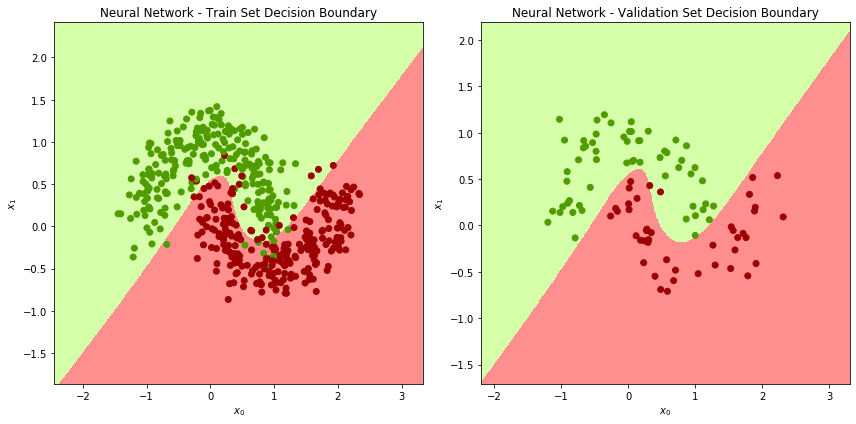

In [64]:
from matplotlib.pyplot import figure
figure(figsize = (12,6))

plt.subplot(1, 2, 1)
plot_decision_boundary(X_train, y_train, nn, 'Neural Network - Train Set')         
plt.tight_layout()

plt.subplot(1, 2, 2)
plot_decision_boundary(X_test, y_test, nn, 'Neural Network - Validation Set')         
plt.tight_layout()

<br>

**c)**

The Neural Network that I created runs pretty well and gives consistent results comparable to those of scikit-learn's model. We could nevertheless improve it in many ways, such as the following:
- We did not add a bias term when feeding matrixes in the neural network. We should add it.
- The Neural Network runs pretty slowly compared to the one from scikit-learn. Part of the reason is that our code is not optimized as well as scikit-learn's one, but it is also because we did not add a break term once we reach a certain level of error that is below a threshold.
- We should add assertions to make sure that the arguments passed to the Neural Network are correct and give meaningful errors if they were not.